<a href="https://colab.research.google.com/github/swastikbanerjee/DL_Lab/blob/main/dlLab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras import layers, Sequential, regularizers
from imblearn.over_sampling import RandomOverSampler
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score,auc,roc_curve

1.Imagine you are the manager of an online retail store, and you want to optimize the pricing strategy for a specific product based on real-time data with the objective to minimize the revenue lost on the marketing/advertisements of a product. Assume the revenue function is given by

ƒ (w) = 0.5w2 -30w +100, where w is the cost on the product advertisement.

Start with an initial price as w=20 and find the optimal price (w) using appropriate momentum based optimization algorithm that could minimize the revenue lost.

In [ ]:
def function(x):
  return 0.5*x**2 -30*x + 100
def gradient_descent(x):
  momentum = 0
  w = 20
  for i in range(3):
    gradient = x - 30
    momentum = 0.9 * momentum + 0.1 *gradient
    w  = w -  momentum
  return w
print("Estimated Optimal Price",gradient_descent(20))

Estimated Optimal Price 25.61


In [ ]:
data = pd.read_csv("/content/heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
data.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


<Axes: >

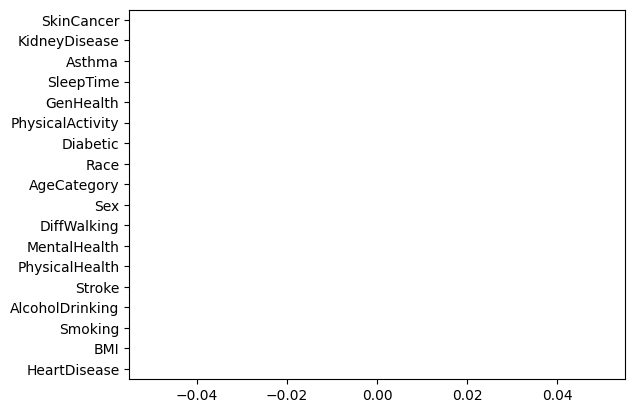

In [ ]:
data.isna().sum().plot(kind='barh')

In [ ]:
gender_count = data['Sex'].value_counts()
gender_count

Female    167805
Male      151990
Name: Sex, dtype: int64

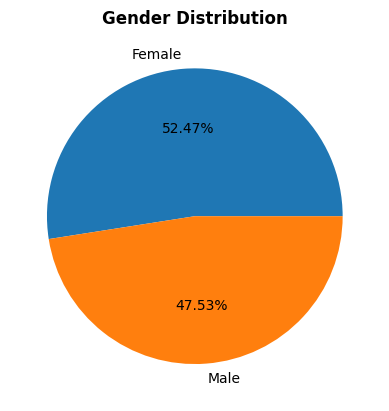

In [ ]:
plt.title("Gender Distribution", fontsize = 12, weight='bold')
plt.pie(gender_count,labels=gender_count.index,radius=1, autopct='%.2f%%')
plt.show()

In [ ]:
lb = LabelEncoder()
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
for col in cat_cols:
    data[col] = lb.fit_transform(data[col])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


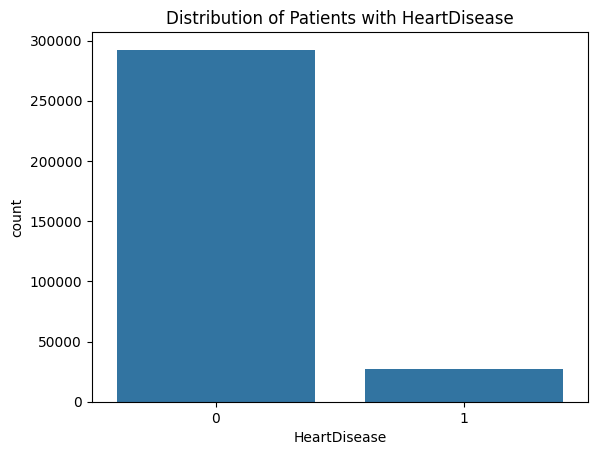

In [ ]:
sns.countplot(data = data, x = 'HeartDisease')
plt.title("Distribution of Patients with HeartDisease")
plt.show()

<Axes: >

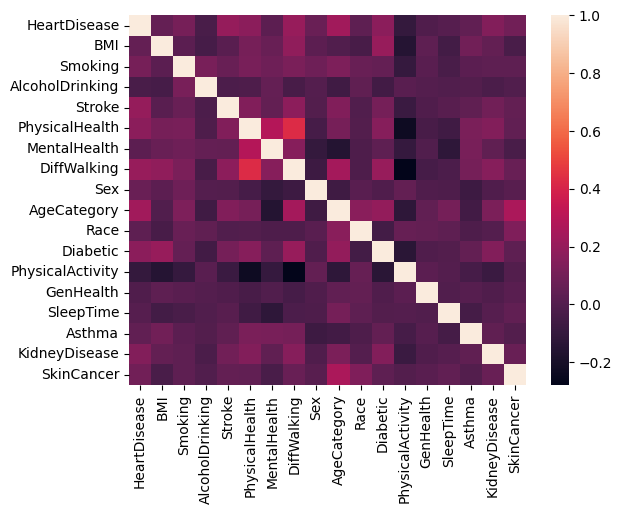

In [ ]:
sns.heatmap(data.corr())

In [ ]:
x = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

In [ ]:
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)
x_train,x_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.2)

In [ ]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

**Simple Neural Network Model**

---



In [ ]:
model1 = Sequential()
model1.add(Dense(units=200, input_dim=17, kernel_initializer='uniform', activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(units=200,  kernel_initializer='uniform', activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               3600      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 44001 (171.88 KB)
Trainable params: 44001 (171.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model1.compile(loss='binary_crossentropy',  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
train_history = model1.fit(x= x_train, y=y_train,  validation_split=0.8, epochs= 100,  batch_size=500, verbose=2)

Epoch 1/100
188/188 - 14s - loss: 0.5502 - accuracy: 0.7233 - val_loss: 0.5148 - val_accuracy: 0.7454 - 14s/epoch - 74ms/step
Epoch 2/100
188/188 - 9s - loss: 0.5354 - accuracy: 0.7364 - val_loss: 0.5214 - val_accuracy: 0.7498 - 9s/epoch - 46ms/step
Epoch 3/100
188/188 - 5s - loss: 0.5328 - accuracy: 0.7396 - val_loss: 0.5145 - val_accuracy: 0.7448 - 5s/epoch - 27ms/step
Epoch 4/100
188/188 - 7s - loss: 0.5313 - accuracy: 0.7409 - val_loss: 0.5155 - val_accuracy: 0.7543 - 7s/epoch - 37ms/step
Epoch 5/100
188/188 - 4s - loss: 0.5269 - accuracy: 0.7451 - val_loss: 0.5159 - val_accuracy: 0.7555 - 4s/epoch - 22ms/step
Epoch 6/100
188/188 - 4s - loss: 0.5257 - accuracy: 0.7452 - val_loss: 0.5205 - val_accuracy: 0.7561 - 4s/epoch - 22ms/step
Epoch 7/100
188/188 - 8s - loss: 0.5267 - accuracy: 0.7454 - val_loss: 0.5189 - val_accuracy: 0.7562 - 8s/epoch - 40ms/step
Epoch 8/100
188/188 - 4s - loss: 0.5270 - accuracy: 0.7438 - val_loss: 0.5386 - val_accuracy: 0.7559 - 4s/epoch - 24ms/step
Epoch 

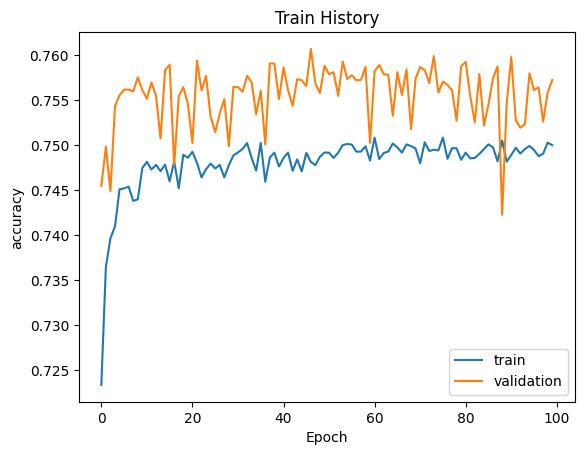

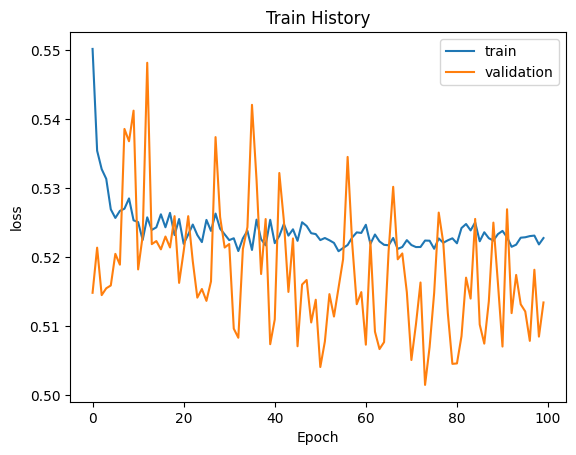

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [ ]:
scores = model1.evaluate(x_test, y_test)
print('\n')
print('accuracy=',scores[1])

3656/3656 [==============================] - 8s 2ms/step - loss: 0.5132 - accuracy: 0.7584


accuracy= 0.7583889961242676


In [ ]:
predictions1 = (model1.predict(x_test) > 0.5).astype("int32")

3656/3656 [==============================] - 8s 2ms/step


In [ ]:
print(classification_report(predictions1,y_test))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74     50988
           1       0.82      0.73      0.77     65981

    accuracy                           0.76    116969
   macro avg       0.76      0.76      0.76    116969
weighted avg       0.77      0.76      0.76    116969



**Applying L1 Regularization**

---
L1 regularization is also referred to as lasso regression. In this type of regularization, the absolute value of the magnitude of coefficients or weights multiplied with a regularizer term is added to the loss or cost function. It can be represented with the following equation.

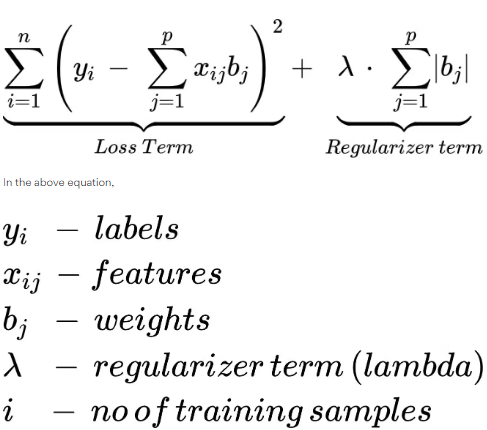

A fraction of the sum of absolute values of weights to the loss function is added in the L1 regularization. In this way, you will be able to eliminate some coefficients with lesser values by pushing those values towards 0. You can observe the following by using L1 regularization:

- Since the L1 regularization adds an absolute value as a penalty to the cost function, the feature selection will be done by retaining only some important features and eliminating the lower or unimportant features.
- This technique is also robust to outliers, i.e., the model will be able to easily learn about outliers in the dataset.
- This technique will not be able to learn complex patterns from the input data.


In [ ]:
model = Sequential()
model.add(Dense(units=200, input_dim=17, kernel_initializer='uniform', activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.5))
model.add(Dense(units=200,  kernel_initializer='uniform', activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 200)               3600      
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 44001 (171.88 KB)
Trainable params: 44001 (171.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model.compile(loss='binary_crossentropy',  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
train_history = model.fit(x= x_train, y=y_train,  validation_split=0.8, epochs=100,  batch_size=500, verbose=2)

Epoch 1/100
188/188 - 6s - loss: 1.5170 - accuracy: 0.6031 - val_loss: 1.1931 - val_accuracy: 0.7060 - 6s/epoch - 30ms/step
Epoch 2/100
188/188 - 4s - loss: 1.2023 - accuracy: 0.6419 - val_loss: 1.2067 - val_accuracy: 0.6135 - 4s/epoch - 22ms/step
Epoch 3/100
188/188 - 5s - loss: 1.1944 - accuracy: 0.6593 - val_loss: 1.1793 - val_accuracy: 0.6956 - 5s/epoch - 28ms/step
Epoch 4/100
188/188 - 4s - loss: 1.1836 - accuracy: 0.6734 - val_loss: 1.1350 - val_accuracy: 0.6919 - 4s/epoch - 21ms/step
Epoch 5/100
188/188 - 4s - loss: 1.1747 - accuracy: 0.6785 - val_loss: 1.1647 - val_accuracy: 0.6834 - 4s/epoch - 23ms/step
Epoch 6/100
188/188 - 5s - loss: 1.1710 - accuracy: 0.6823 - val_loss: 1.1347 - val_accuracy: 0.7137 - 5s/epoch - 27ms/step
Epoch 7/100
188/188 - 4s - loss: 1.1660 - accuracy: 0.6826 - val_loss: 1.1437 - val_accuracy: 0.6993 - 4s/epoch - 22ms/step
Epoch 8/100
188/188 - 4s - loss: 1.1652 - accuracy: 0.6821 - val_loss: 1.1536 - val_accuracy: 0.7015 - 4s/epoch - 22ms/step
Epoch 9/

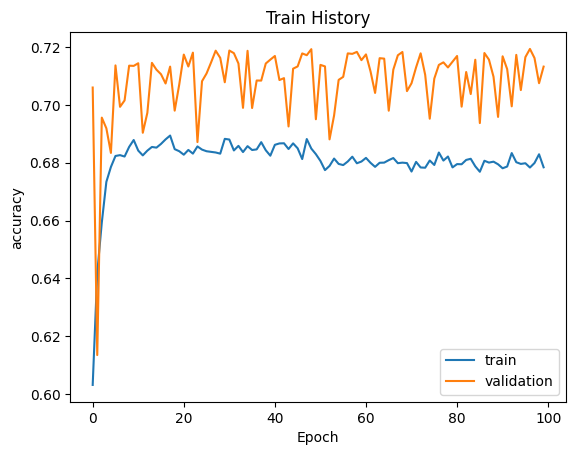

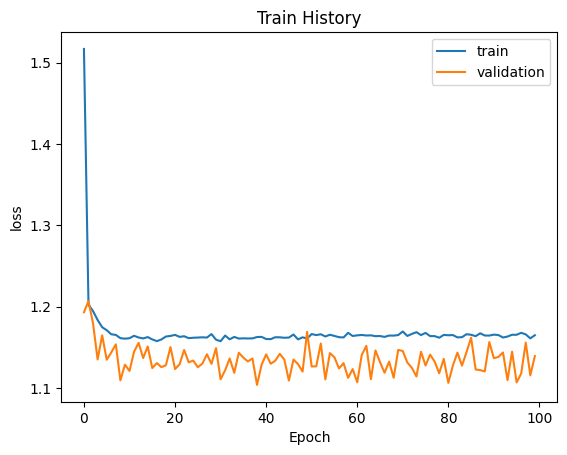

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [ ]:
scores = model.evaluate(x_test, y_test)
print('\n')
print('accuracy=',scores[1])

3656/3656 [==============================] - 9s 2ms/step - loss: 1.1389 - accuracy: 0.7138


accuracy= 0.7138215899467468


In [ ]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

3656/3656 [==============================] - 7s 2ms/step


In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.60      0.78      0.68     45023
           1       0.83      0.67      0.74     71946

    accuracy                           0.71    116969
   macro avg       0.71      0.73      0.71    116969
weighted avg       0.74      0.71      0.72    116969



**Applying L2 Regularization**

---

According to regression analysis, L2 regularization is also called ridge regression. In this type of regularization, the squared magnitude of the coefficients or weights multiplied with a regularizer term is added to the loss or cost function. L2 regression can be represented with the following mathematical equation.

Loss:

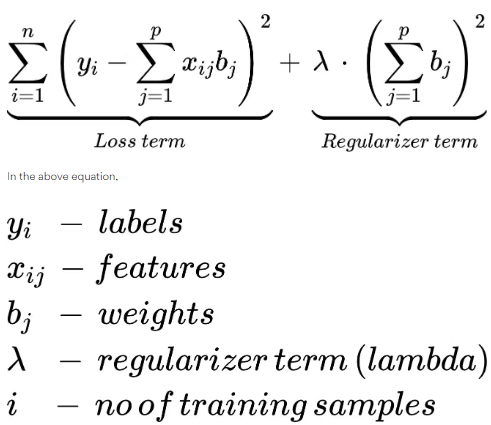

You can see that a fraction of the sum of squared values of weights is added to the loss function. Thus, when gradient descent is applied on loss, the weight update seems to be consistent by giving almost equal emphasis on all features. You can observe the following:

- Lambda is the hyperparameter that is tuned to prevent overfitting i.e. penalize the insignificant weights by forcing them to be small but not zero.
- L2 regularization works best when all the weights are roughly of the same size, i.e., input features are of the same range.
- This technique also helps the model to learn more complex patterns from data without overfitting easily.

In [ ]:
model2 = Sequential()
model2.add(Dense(units=200, input_dim=17, kernel_initializer='uniform', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dropout(0.5))
model2.add(Dense(units=200,  kernel_initializer='uniform', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dropout(0.5))
model2.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 200)               3600      
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 200)               40200     
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 201       
                                                                 
Total params: 44001 (171.88 KB)
Trainable params: 44001 (171.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model2.compile(loss='binary_crossentropy',  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
train_history = model2.fit(x= x_train, y=y_train,  validation_split=0.8, epochs=200,  batch_size=500, verbose=2)

Epoch 1/200
188/188 - 9s - loss: 0.6164 - accuracy: 0.7042 - val_loss: 0.5619 - val_accuracy: 0.7335 - 9s/epoch - 46ms/step
Epoch 2/200
188/188 - 7s - loss: 0.5867 - accuracy: 0.7164 - val_loss: 0.5624 - val_accuracy: 0.7325 - 7s/epoch - 36ms/step
Epoch 3/200
188/188 - 9s - loss: 0.5877 - accuracy: 0.7152 - val_loss: 0.5701 - val_accuracy: 0.7197 - 9s/epoch - 48ms/step
Epoch 4/200
188/188 - 8s - loss: 0.5895 - accuracy: 0.7153 - val_loss: 0.5643 - val_accuracy: 0.7403 - 8s/epoch - 44ms/step
Epoch 5/200
188/188 - 8s - loss: 0.5891 - accuracy: 0.7142 - val_loss: 0.5606 - val_accuracy: 0.7376 - 8s/epoch - 43ms/step
Epoch 6/200
188/188 - 7s - loss: 0.5835 - accuracy: 0.7185 - val_loss: 0.5509 - val_accuracy: 0.7398 - 7s/epoch - 36ms/step
Epoch 7/200
188/188 - 4s - loss: 0.5897 - accuracy: 0.7169 - val_loss: 0.5637 - val_accuracy: 0.7415 - 4s/epoch - 22ms/step
Epoch 8/200
188/188 - 4s - loss: 0.5899 - accuracy: 0.7176 - val_loss: 0.5808 - val_accuracy: 0.7257 - 4s/epoch - 24ms/step
Epoch 9/

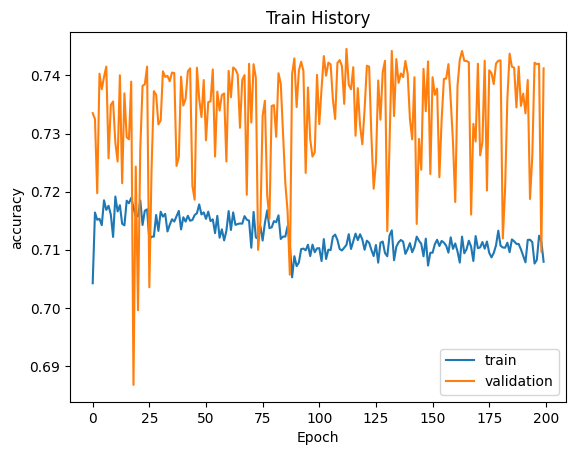

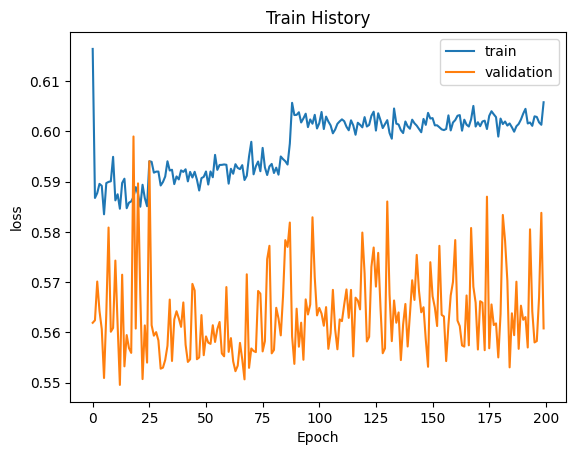

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')`
show_train_history(train_history,'loss','val_loss')

In [ ]:
scores = model2.evaluate(x_test, y_test)
print('\n')
print('accuracy=',scores[1])

3656/3656 [==============================] - 9s 3ms/step - loss: 0.5602 - accuracy: 0.7416


accuracy= 0.7416067719459534


In [ ]:
predictions2 = (model2.predict(x_test) > 0.5).astype("int32")

3656/3656 [==============================] - 8s 2ms/step


In [ ]:
print(classification_report(predictions2,y_test))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73     51997
           1       0.80      0.72      0.75     64972

    accuracy                           0.74    116969
   macro avg       0.74      0.74      0.74    116969
weighted avg       0.75      0.74      0.74    116969



**Applying Elastic Net Regularization**

---

The third type of regularization, uses both L1 and L2 regularizations to produce most optimized output.
In addition to setting and choosing a lambda value elastic net also allows us to tune the alpha parameter where 𝞪 = 0 corresponds to ridge and 𝞪 = 1 to lasso. Simply put, if you plug in 0 for alpha, the penalty function reduces to the L1 (ridge) term and if we set alpha to 1 we get the L2 (lasso) term.

Loss:
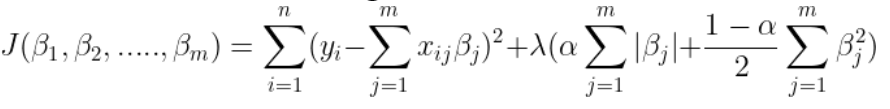

Therefore we can choose an alpha value between 0 and 1 to optimize the elastic net(here we can adjust the weightage of each regularization,thus giving the name elastic). Effectively this will shrink some coefficients and set some to 0 for sparse selection.

In [ ]:
model3 = Sequential()
model3.add(Dense(units=200, input_dim=17, kernel_initializer='uniform', activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model3.add(Dropout(0.5))
model3.add(Dense(units=200,  kernel_initializer='uniform', activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model3.add(Dropout(0.5))
model3.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))
print(model3.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 200)               3600      
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 200)               40200     
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 201       
                                                                 
Total params: 44001 (171.88 KB)
Trainable params: 44001 (171.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model3.compile(loss='binary_crossentropy',  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
train_history = model3.fit(x= x_train, y=y_train,  validation_split=0.8, epochs=100,  batch_size=500, verbose=2)

Epoch 1/200
188/188 - 6s - loss: 1.5296 - accuracy: 0.6165 - val_loss: 1.2289 - val_accuracy: 0.5527 - 6s/epoch - 32ms/step
Epoch 2/200
188/188 - 6s - loss: 1.2082 - accuracy: 0.6516 - val_loss: 1.1864 - val_accuracy: 0.7029 - 6s/epoch - 30ms/step
Epoch 3/200
188/188 - 7s - loss: 1.1921 - accuracy: 0.6715 - val_loss: 1.1518 - val_accuracy: 0.7016 - 7s/epoch - 37ms/step
Epoch 4/200
188/188 - 6s - loss: 1.1838 - accuracy: 0.6787 - val_loss: 1.1148 - val_accuracy: 0.7043 - 6s/epoch - 32ms/step
Epoch 5/200
188/188 - 4s - loss: 1.1743 - accuracy: 0.6822 - val_loss: 1.1514 - val_accuracy: 0.7153 - 4s/epoch - 24ms/step
Epoch 6/200
188/188 - 4s - loss: 1.1705 - accuracy: 0.6816 - val_loss: 1.1320 - val_accuracy: 0.7187 - 4s/epoch - 22ms/step
Epoch 7/200
188/188 - 5s - loss: 1.1707 - accuracy: 0.6823 - val_loss: 1.1366 - val_accuracy: 0.7108 - 5s/epoch - 29ms/step
Epoch 8/200
188/188 - 5s - loss: 1.1693 - accuracy: 0.6838 - val_loss: 1.1628 - val_accuracy: 0.7083 - 5s/epoch - 24ms/step
Epoch 9/

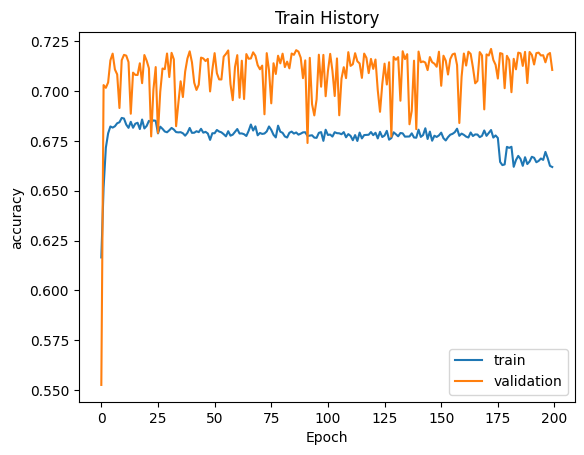

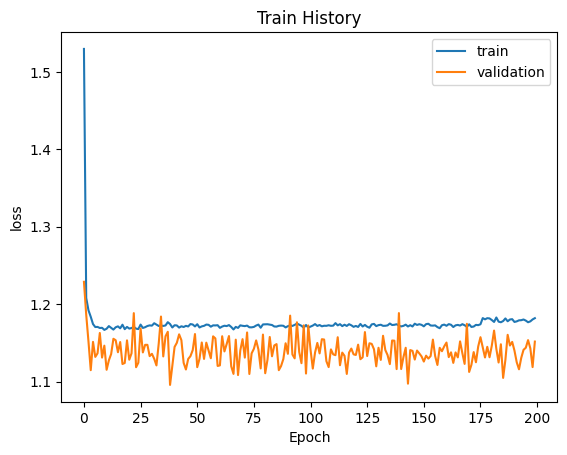

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [ ]:
scores = model3.evaluate(x_test, y_test)
print('\n')
print('accuracy=',scores[1])

3656/3656 [==============================] - 8s 2ms/step - loss: 1.1510 - accuracy: 0.7115


accuracy= 0.7115047574043274


In [ ]:
predictions3 = (model3.predict(x_test) > 0.5).astype("int32")

3656/3656 [==============================] - 6s 2ms/step


In [ ]:
print(classification_report(predictions3,y_test))

              precision    recall  f1-score   support

           0       0.55      0.81      0.66     39680
           1       0.87      0.66      0.75     77289

    accuracy                           0.71    116969
   macro avg       0.71      0.74      0.70    116969
weighted avg       0.76      0.71      0.72    116969



In [ ]:
cm1 = confusion_matrix(predictions1,y_test)
cm2 = confusion_matrix(predictions,y_test)
cm3 = confusion_matrix(predictions2,y_test)
cm4 = confusion_matrix(predictions3,y_test)

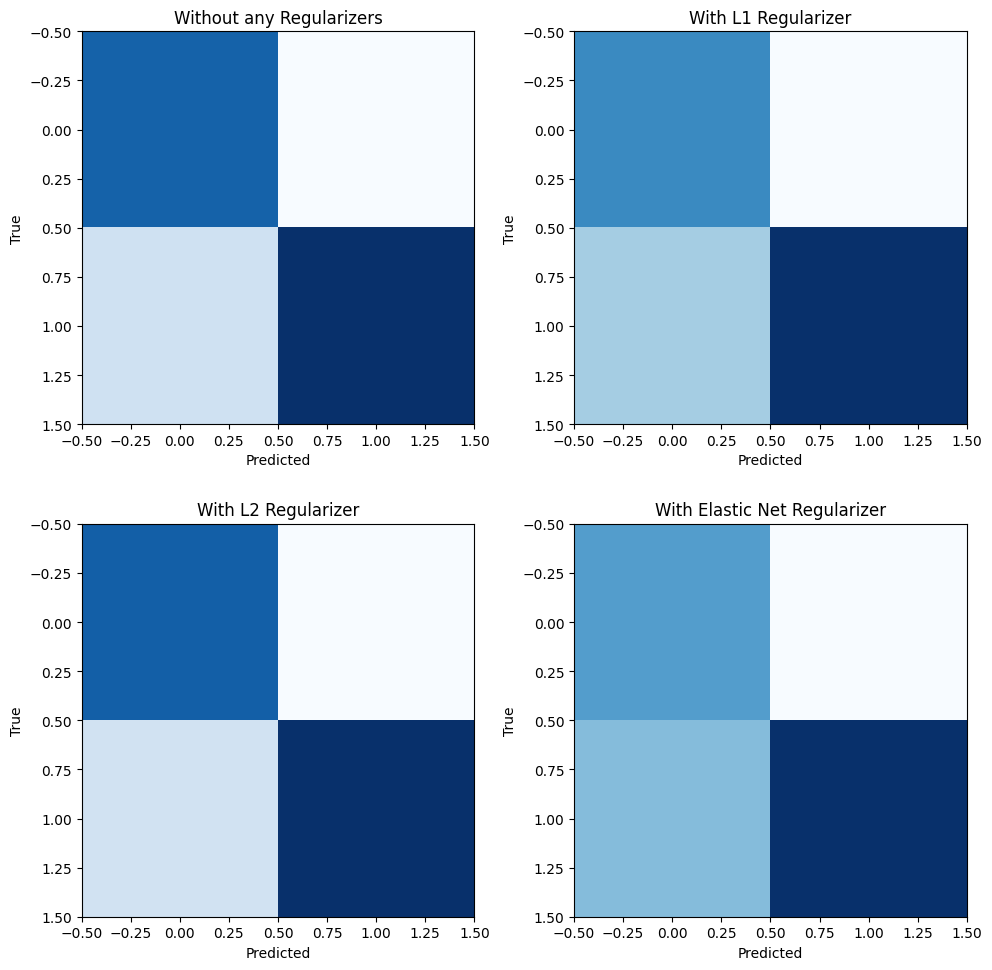

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(cm1, cmap='Blues', interpolation='nearest')
axs[0, 0].set_title('Without any Regularizers')
axs[0, 0].set_xlabel('Predicted')
axs[0, 0].set_ylabel('True')

axs[0, 1].imshow(cm2, cmap='Blues', interpolation='nearest')
axs[0, 1].set_title('With L1 Regularizer')
axs[0, 1].set_xlabel('Predicted')
axs[0, 1].set_ylabel('True')

axs[1, 0].imshow(cm3, cmap='Blues', interpolation='nearest')
axs[1, 0].set_title('With L2 Regularizer')
axs[1, 0].set_xlabel('Predicted')
axs[1, 0].set_ylabel('True')

axs[1, 1].imshow(cm4, cmap='Blues', interpolation='nearest')
axs[1, 1].set_title('With Elastic Net Regularizer')
axs[1, 1].set_xlabel('Predicted')
axs[1, 1].set_ylabel('True')

plt.tight_layout()
plt.show()

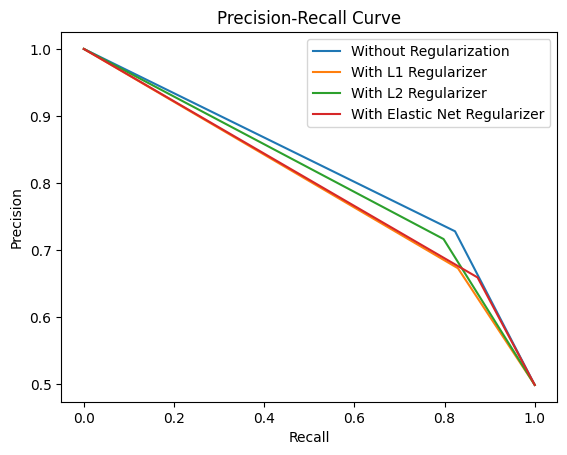

In [ ]:
precision1, recall1, _ = precision_recall_curve(y_test, predictions1)
precision2, recall2, _ = precision_recall_curve(y_test, predictions)
precision3, recall3, _ = precision_recall_curve(y_test, predictions2)
precision4, recall4, _ = precision_recall_curve(y_test, predictions3)

# Plot precision-recall curves
plt.plot(recall1, precision1, label='Without Regularization')
plt.plot(recall2, precision2, label='With L1 Regularizer')
plt.plot(recall3, precision3, label='With L2 Regularizer')
plt.plot(recall4, precision4, label='With Elastic Net Regularizer')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

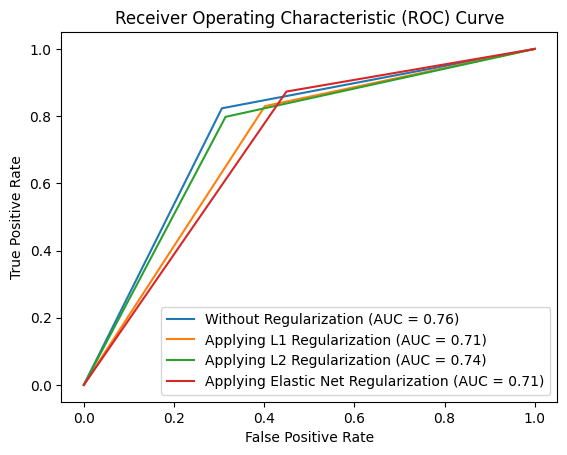

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test, predictions1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, predictions)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, predictions2)
roc_auc3 = auc(fpr3, tpr3)

fpr4, tpr4, _ = roc_curve(y_test, predictions3)
roc_auc4 = auc(fpr4, tpr4)

# Plot ROC curves
plt.plot(fpr1, tpr1, label='Without Regularization (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Applying L1 Regularization (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Applying L2 Regularization (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='Applying Elastic Net Regularization (AUC = %0.2f)' % roc_auc4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**INFERENCE**

---

Regularization techniques like L1, L2, and Elastic Net are used to prevent overfitting in machine learning models. L1 regularization (Lasso) adds a penalty term to the loss function that encourages sparsity in the model, meaning it tends to set some of the weights to zero, effectively removing some features from the model. L2 regularization (Ridge) adds a penalty term to the loss function that shrinks the weights towards zero without encouraging sparsity. Elastic Net regularization is a combination of L1 and L2 regularization, providing a balance between sparsity and shrinkage of the weights. In the medical domain, where datasets often have a moderate number of features and avoiding overfitting is crucial, L2 regularization is often a good choice.